In [94]:
from glob import glob

In [95]:
from tensorflow.keras.applications.resnet50 import ResNet50 as pretraindedModel, preprocess_input

In [96]:
from tensorflow.keras.layers import Dense, Flatten

In [97]:
from tensorflow.keras.models import Model

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [119]:
trainpath= 'data/train'
testpath = 'data/test'

In [150]:
imagesize=[100,100]

In [151]:
imagefiles= glob(trainpath + '/*/*.jp*g')

In [152]:
validimagefiles= glob(testpath + '/*/*.jp*g')

In [153]:
folders=glob(trainpath + '/*')

In [154]:
from tensorflow.keras.preprocessing import image

In [155]:
import numpy as np

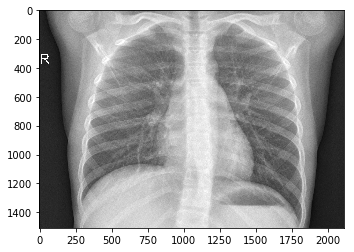

In [156]:
plt.imshow(image.load_img(np.random.choice(imagefiles)))

In [157]:
ptm = pretraindedModel(

input_shape = imagesize + [3],

weights = 'imagenet',

    include_top=False




)

In [158]:
ptm.trainable=False

In [159]:
k=len(folders)

In [160]:
x = Flatten()(ptm.output)
x= Dense(k , activation= 'softmax')(x)

In [161]:
model = Model(inputs = ptm.input, outputs = x)

In [162]:
gen = ImageDataGenerator(

rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input




)

In [163]:
batchsize=128

In [164]:
traingen= gen.flow_from_directory(


trainpath,
    shuffle=True,
    target_size=imagesize,
    batch_size=batchsize



)

Found 12 images belonging to 2 classes.


In [165]:
testgen= gen.flow_from_directory(


testpath,
    shuffle=True,
    target_size=imagesize,
    batch_size=batchsize



)

Found 12 images belonging to 2 classes.


In [166]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [168]:
r= model.fit_generator(traingen, validation_data=testgen, epochs= 4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/4
1/1 [==============================] - 5s 5s/step - loss: 0.6574 - accuracy: 0.8333 - val_loss: 3.8157 - val_accuracy: 0.4167
Epoch 2/4
1/1 [==============================] - 3s 3s/step - loss: 1.0803 - accuracy: 0.9167 - val_loss: 4.2715 - val_accuracy: 0.5000
Epoch 3/4
1/1 [==============================] - 2s 2s/step - loss: 0.2276 - accuracy: 0.8333 - val_loss: 4.7739 - val_accuracy: 0.5000
Epoch 4/4
1/1 [==============================] - 3s 3s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 5.1613 - val_accuracy: 0.5833


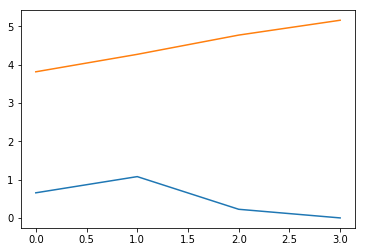

In [169]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])


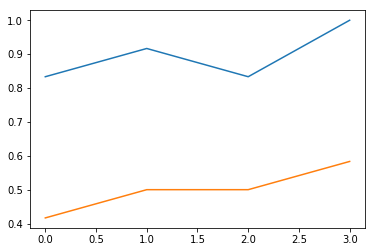

In [170]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
